Sometimes when given data that must survive some selection, it is intuitively tempting to draw exactly the wrong conclusion. 

To illustrate this, let's have our blob creatures play a game, which works as follows:-

- Each team has access to identical stained-glass windows which form a 10 x 10 grid of glass.
- During each round, the blobs sling 3 rocks at each others' glass panels.
- Each panel has a different probability of breaking if hit by a rock.
- The probabilities remain constant for each panel.
- The blobs get their panel back if it is hit by 3 rocks and surives. Otherwise, it shatters and they don't get it back.
- Our job is to decide where to put armor on our panels, and where to aim at the opposing panels.

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

Let's generate the panel. The blobs don't see this, but we do.

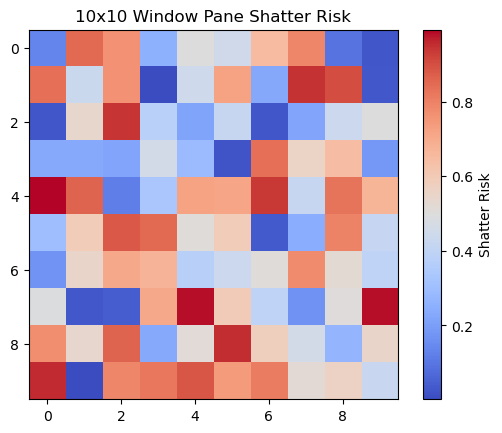

In [2]:
glassPane = [[r.uniform(0, 1) for j in range(10)] for i in range(10)]
plt.imshow(glassPane, cmap = "coolwarm")
plt.colorbar(label = "Shatter Risk")
plt.title("Window Pane Shatter Risk")
plt.show()

We can see that, for example, we really don't want (0, 4) to get hit. (1, 9) is probably fine though. So now let's generate some data for our blobs to see. We'll play 100,000 rounds of the game and see only the panes which do not get destroyed.

In [3]:
def generateStrategy():
    i = 0
    output = []
    while i < 3:
        target = [r.randint(0, 9), r.randint(0, 9)]
        if target not in output:
            output.append(target)
            i += 1
    return(output)

def checkSurvival(strategy):
    survives = True
    i = 0
    while survives and i < 3:
        if r.uniform(0, 1) < glassPane[strategy[i][0]][strategy[i][1]]:
            survives = False
        i += 1
    return(strategy if survives else None)

dataset = []
for i in range(100000):
    strategy = generateStrategy()
    outcome = checkSurvival(strategy)
    if outcome is not None:
        dataset.append(outcome)
print(len(dataset))

11810


So now we have data for 11,810 windows that survived the round and where they were hit by rocks. We'll plot a heatmap for how often each pane was hit by rocks in our dataset. But before you see the results, have a think about what a panel being hit a lot in our dataset means. Should we put armor on the places that get hit a lot in our data set? Should we attack the opponents' windows there?

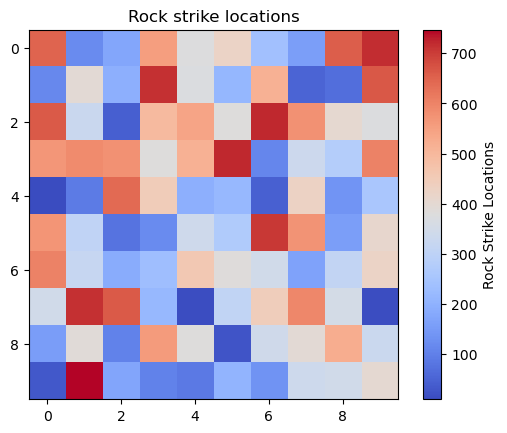

In [4]:
heatmap = [[0 for j in range(10)] for i in range(10)]
for datapoint in dataset:
    for i in range(3):
        heatmap[datapoint[i][0]][datapoint[i][1]] += 1
plt.imshow(heatmap, cmap = "coolwarm")
plt.colorbar(label = "Rock Strike Locations")
plt.title("Rock strike locations")
plt.show()

Notice that our new heatmap is effectively the inverse of our old heatmap. Areas which were "warm" in the true probabilities are "cool" here and vice versa. What's going on?

Intuitively, if we have a bunch of windows with rock impact marks on, we feel like we want to reinforce the parts of the window that are getting hit a lot. But this is exactly the opposite of what we should do! Why? Because our dataset represents data for where you can hit a window pane and it still not shatter! So we don't need to put extra armor in the places where we're seeing a lot of rock impacts!

Other windows got hit in more vulnerable places and didn't wind up in the dataset because they shattered. So we should put our extra armor in the places that we *don't* see getting hit in our dataset. This is the survivorship fallacy highlighted: intuitive reasoning can lead us to exactly the opposite conclusion when we're given data which survives a selection pressure.